# Before you start :
   - These exercises are related to the Pivot tables and correlation.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [85]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [64]:
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it. Do it both ways

In [4]:
employee.groupby(['Department']).mean()


,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [5]:
employee.pivot_table(index=['Department'])

,Salary,Years
Department,,
HR,45.00,4.666667
IT,48.75,4.500000
Sales,55.00,2.500000


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [6]:
employee.pivot_table(index=['Department'], columns=['Title'])

Salary                   Years                  
Title          VP analyst associate    VP analyst associate
Department                                                 
HR           70.0    32.5       NaN   8.0     3.0       NaN
IT           70.0    32.5      60.0   8.0     1.5       7.0
Sales         NaN     NaN      55.0   NaN     NaN       2.5

#### We want to display the number of years of work experience and the salary for each Title.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [7]:
employee.pivot_table(index=['Title'], values=['Years', 'Salary'])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Add to the previous pivot table the information about the number of employees in each department

In [68]:
# employee.groupby(['Department']).concat([Count, Salary],axis=1)
employee.pivot_table(index=['Title'], values=['Years', 'Salary'], aggfunc=('count'))
# How do we get the number of employees, without changing the value mean ...?
# 
# Also, this question is different to what others in class had ...!
# pd.concat([df1, df2],axis=1)

,Salary,Years
Title,,
VP,2,2
analyst,4,4
associate,3,3


#### Add to the table of the last question the Salary's median,minimum,maximum and standard deviation. Comment your results

In [55]:
employee.pivot_table(index=['Title'], values=['Years', 'Salary'], aggfunc=('count', 'mean', 'min', 'max', 'std'))

Salary                                  Years                  \
           count   max       mean   min       std count  max  mean  min   
Title                                                                     
VP           2.0  70.0  70.000000  70.0  0.000000   2.0  8.0  8.00  8.0   
analyst      4.0  35.0  32.500000  30.0  2.886751   4.0  4.0  2.25  1.0   
associate    3.0  60.0  56.666667  55.0  2.886751   3.0  7.0  4.00  2.0   

                     
                std  
Title                
VP         0.000000  
analyst    1.258306  
associate  2.645751

All as expected. It is curious that the Standard deviation for the salary is the same for both analyst and associates

#### Based on your comments, fill the missing values with an appropriate value

In [9]:
whatś  missing?

#### The share holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [70]:
employee.groupby('Department').agg({'Name':'count','Salary':'sum'})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [71]:
employee.groupby('Department').agg({'Years':'count', 'Salary':'mean'})

,Years,Salary
Department,,
HR,3,45.00
IT,4,48.75
Sales,2,55.00


#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
def whenIhaveTime
    return BonusQuestions
        

In [13]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [73]:
fitbit = pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [80]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [78]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [82]:
fitbit[['Minutes Very Active', 'Steps']].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [87]:
# your answer here
x = fitbit['Minutes Very Active']
y = fitbit['Steps']

fig, ax = plt.subplots()
ax = sns.regplot(x='Minutes Very Active', y='Steps' data = fitbit)





# ax.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
# plt.xlabel('Minutes Very Active')
# plt.ylabel('Steps')
# plt.title('Corr(Minutes Very Active, Steps)')

# # Recta de regresión lineal
# n, m = polyfit(x, y, 1)
# plt.plot(x, m * x + n, '-', color='red')

# plt.show()



SyntaxError: invalid syntax (<ipython-input-87-e13cfa6e0034>, line 6)

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [20]:
# your answer here

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [21]:
# your answer here

In [22]:
# Your comment here

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [23]:
# your answer here

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [24]:
# your answer here

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [25]:
# your answer here

In [26]:
#Print cor_fit

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [27]:
# your answer here

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [28]:
time_grades = pd.read_csv('Time_Grades.csv')  

In [29]:
#Print time_grades
print(time_grades) 

        Name  Study time  Grade
0       Jose           4      4
1      Maria           9      7
2      David           8      9
3      Sonia          10      7
4     Samuel          20      9
5        Eva           5      3
6     Carlos          12      7
7      Pedro           6      5
8        Ana          18      9
9   Gervasio           7      3
10     Gemma           7      8
11    Alicia          11      7
12  Jonathan           2      1
13  Cristina          13      8
14     Pilar           3      2


#### Show visually the frequency distribution of the time_grades dataset.

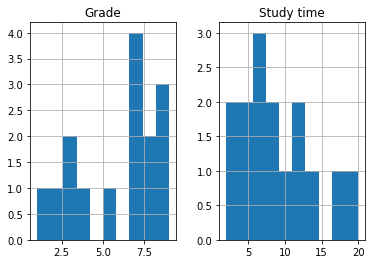

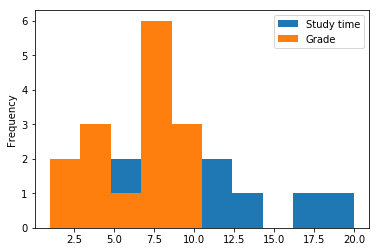

In [89]:
time_grades.hist()
time_grades.plot.hist()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [92]:
time_grades['Study time'].corr(time_grades['Grade'])

0.7980456073578858

In [93]:
time_grades['Study time'].corr(time_grades['Grade'],method='spearman')

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

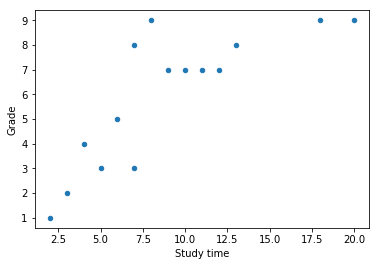

In [99]:
time_grades.plot.scatter(x ='Study time', y ='Grade')

In [ ]:
Hay una correlación positiva  lineal 

#### Could you explain the difference between Pearson and Spearman correlation?

In [ ]:
#your comment here

# PERSONAL TESTS:

In [ ]:
employee.pivot_table(index = ['Department'], values= ['Salary'], aggfunc=np.mean)